<a href="https://colab.research.google.com/github/WesleyEzequiel/projeto/blob/main/acidentes_aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # A biblioteca Pandas é uma biblioteca Python para análise de dados. Ultilizada para criar Dataframes
import matplotlib.pyplot as plt  #Biblioteca com recursos para a geração de gráficos 2D a partir de arrays.
%matplotlib inline  
#permite que os graficos sejam criados na aba atual
import seaborn as sns # biblioteca de visualização para plotagem de gráficos estatísticos em Python.
import numpy as np # biblioteca de código aberto destinada a realizar operações em arrays multidimensionais.
from collections import Counter #Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário
import statistics as static # scipy é um pacote que contém várias ferramentas dedicadas a problemas comuns em computação científica.

In [3]:
#importação dos dados
ae = pd.read_csv('/content/ocorrencias_cenipa.csv - ocorrencias_cenipa.csv.csv', index_col=0)

In [4]:
# analise das informações dos dados
ae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 40107 to 79227
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tipo                       5242 non-null   object
 1   descricao                  5242 non-null   object
 2   cidade                     5242 non-null   object
 3   estado                     5242 non-null   object
 4   data                       5242 non-null   object
 5   ano                        5242 non-null   int64 
 6   hora                       5242 non-null   object
 7   aeronave_liberada          5242 non-null   object
 8   status_investigacao        5242 non-null   object
 9   aeronaves_envolvidas       5242 non-null   int64 
 10  ocorrencia_saida_pista     5242 non-null   object
 11  aeronave_tipo              5242 non-null   object
 12  aeronave_fabricante        5242 non-null   object
 13  motor_tipo                 5242 non-null   object
 14  aer

In [5]:
ae.describe()

,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.000000,5242.000000,5242.000000,5242.000000
mean,2014.180847,1.011828,27.575353,1863.320870
std,2.849750,0.111593,54.528085,507.051481
min,2010.000000,1.000000,0.000000,0.000000
25%,2012.000000,1.000000,2.000000,1978.000000
50%,2014.000000,1.000000,6.000000,1992.000000
75%,2017.000000,1.000000,10.000000,2007.000000
max,2019.000000,3.000000,384.000000,9999.000000


In [6]:
ae.head()

,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,,,,,,
40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [7]:
ae.tail()

,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,,,,,,
79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,2019-10-23,2019,15:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,2019-10-11,2019,10:00:00,SIM,FINALIZADA,1,NÃO,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA
79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,2019-09-21,2019,18:30:00,SIM,FINALIZADA,1,NÃO,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,BRASIL,DECOLAGEM,SUBSTANCIAL
79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,2019-12-20,2019,16:37:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE
79227,ACIDENTE,OUTROS,NOVO PROGRESSO,PA,2017-01-20,2017,16:24:00,SIM,FINALIZADA,1,NÃO,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,8,1974,BRASIL,POUSO,SUBSTANCIAL


# **Analise de investigações**

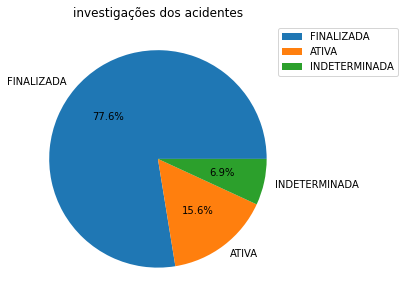

In [8]:
#acidentes com investigação ativa/finalizada

#definindo o tipo, cor e tamanho do grafico
ae['status_investigacao'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label = '', title="investigações dos acidentes" ,figsize=(8, 5))

#mostra o grafico
plt.legend(bbox_to_anchor = (1.40, 1.0)) 
plt.show()

O gráfico nos mostra que as investigações da maiorias dos incidentes já foram fizalizadas (77,6%) e ja sabem o motivo que resultou o incidente. 

Já uma pequena parte dos incidentes ainda não foram solucionados (22,5%). Sendo que 15,6% ainda está ativa e buscando a solução. E 6,9% não sabemos se realmente foi descoberto o motivo do incidente.

#  **Liberação de Aeronaves**

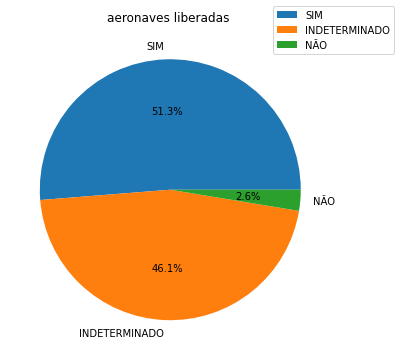

In [9]:
# aeronaves liberadas durante o acidente

#definindo o tipo, cor e tamanho do grafico
ae['aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label = '', title="aeronaves liberadas " ,figsize=(6, 6))

#mostra o grafico
plt.legend(bbox_to_anchor = (0.8, 0.9))
plt.show()

Observando o gráfico a cima, podemos observar que 51,3% das aeronaves com incidentes, tiveram seus voos liberados. Sendo que 46,1% é indeterminado, ou seja, não sabemos ainda ao certo se realmente estavam prontas para decolar. 
E apenas 2,6% não foram liberadas para voo.

# **Ocorrências das Saídas de Pista**

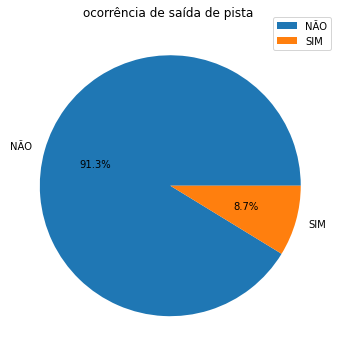

In [10]:
#ocorrencia das saídas de pista

#definindo o tipo, cor e tamanho do grafico
ae['ocorrencia_saida_pista'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label = '', title="ocorrência de saída de pista " ,figsize=(6, 6))

#mostra o grafico
plt.legend(bbox_to_anchor = (0.8, 0.9))
plt.show()

Conforme o gráfico, apenas 8,7% das ocorrências foram feitas ainda na saida da pista de voo. Concluindo que 91,3% dos incidentes ocorreram enquanto as aeronaves estavam no ar.

# **Estados com mais Acidentes**

In [11]:
est = Counter(ae['estado'])
fase_est = sorted(est, key = est.get, reverse = True)
contador_est = sorted(list(est.values()), reverse = True)

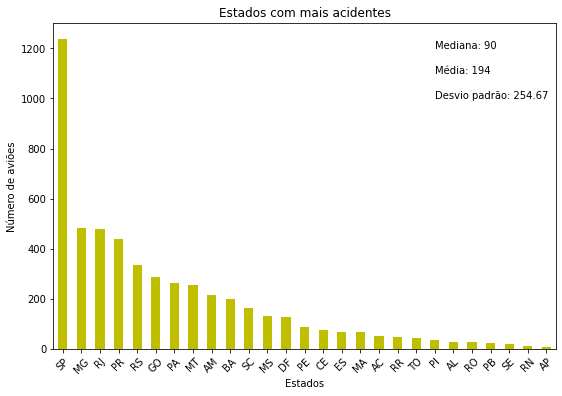

In [12]:
#verificando qual estado tem mais acidentes

#organizando em ordem decrescente
ae['estado'].value_counts().plot(kind = 'bar', figsize=(10, 5), fontsize = 10, color=['y']);

#titulos principais e dos eixos
plt.xlabel("Estados")
plt.ylabel("Número de aviões")
plt.title("Estados com mais acidentes")

#tamanho do grafico mais a rotação do eixo X(titulos)
plt.gcf().set_size_inches(9, 6)
plt.xticks(rotation=45)

#mediana, média e desvio padrão do dados analisado
plt.text(20, 1200, 'Mediana: %d'%(np.median(np.array(contador_est))))
plt.text(20, 1100, 'Média: %d'%(np.mean(np.array(contador_est))))
plt.text(20, 1000, 'Desvio padrão: %.2f'%(static.stdev(contador_est)))
 
#mostra o grafico
plt.show()

Podemos observar que o estado de São Paulo, é o estado com mais indice de acidentes diparado. Chegando a ter mais acidentes que os outros dois seguintes estados juntos (MG e RJ).

Observamso também que os 3 primeiros estados pertecem a região sudeste do Brasil, sendo assim a região onde se mais concentra incidentes aéreos.

# **Ocorrências por Ano**

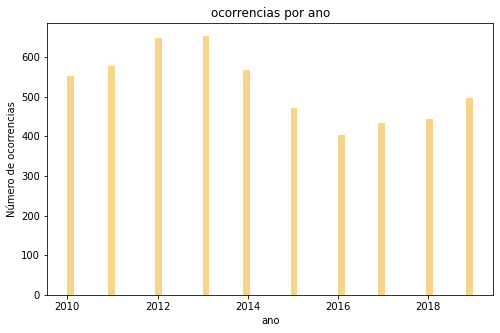

In [13]:
#ocorrencias por ano

#grafico em histograma
ae.ano.hist(bins = 60, color = "#f7d38c")

#titulos principais e dos eixos
plt.xlabel("ano")
plt.ylabel("Número de ocorrencias")
plt.title("ocorrencias por ano")

#tamanho do grafico
plt.gcf().set_size_inches(8, 5)
plt.grid(False)
#plt.style.use("blue")
plt.show()

Análisando o gráfico, o ano de 2013 foi o ano com maior registro incidentes aéreos. E o ano de 2016 o ano com menos registro de incidentes. 

O gráfico nos mostra que o indice de incidentes subiu de 2010 a 2013. Tendo de 2014 a 2016 um redução incidentes bastante considerável. Mas no entanto de 2017 em diante voltou a subir o incide de incidentes.

## **Fabricação de Aeronaves ao longo dos anos**

In [14]:
ae.sort_values('aeronave_ano_fabricacao', ascending=False)

,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,,,,,,
66826,INCIDENTE GRAVE,POUSO EM LOCAL NÃO PREVISTO,OURO,SC,2017-06-02,2017,18:30:00,NÃO,INDETERMINADA,1,NÃO,ULTRALEVE,NORTH LAND,PISTÃO,INDETERMINADO,2,9999,BRASIL,INDETERMINADA,NENHUM
79020,INCIDENTE,GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO...,PORTO ALEGRE,RS,2019-11-28,2019,13:35:00,SIM,FINALIZADA,1,NÃO,HELICÓPTERO,BELL HELICOPTER,TURBOEIXO,MONOMOTOR,5,2019,BRASIL,CRUZEIRO,NENHUM
78869,INCIDENTE,PROBLEMAS FISIOLÓGICOS,SALVADOR,BA,2019-07-09,2019,00:00:00,SIM,FINALIZADA,1,NÃO,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,183,2019,BRASIL,SUBIDA,NENHUM
78947,INCIDENTE,COLISÃO COM OBSTÁCULOS NO SOLO,OROCÓ,PE,2019-09-25,2019,00:00:00,SIM,FINALIZADA,1,NÃO,HELICÓPTERO,HELIBRAS,TURBOEIXO,MONOMOTOR,6,2018,BRASIL,POUSO,LEVE
79088,INCIDENTE,COM TREM DE POUSO,VITÓRIA,ES,2019-07-17,2019,01:03:00,INDETERMINADO,FINALIZADA,1,NÃO,AVIÃO,DIAMOND AIRCRAFT,PISTÃO,BIMOTOR,7,2018,BRASIL,POUSO,LEVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,INCIDENTE,ESTOURO DE PNEU,PORTO VELHO,RO,2018-03-27,2018,19:54:00,SIM,FINALIZADA,1,NÃO,AVIÃO,PIPER AIRCRAFT,PISTÃO,MONOMOTOR,0,0,BRASIL,CORRIDA APÓS POUSO,LEVE
78563,INCIDENTE,FALHA DO MOTOR EM VOO,RIBEIRÃO PRETO,SP,2019-03-02,2019,13:00:00,SIM,FINALIZADA,1,NÃO,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,75,0,BRASIL,SUBIDA,NENHUM
77510,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,BELO HORIZONTE,MG,2017-09-19,2017,17:09:00,SIM,FINALIZADA,1,NÃO,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,7,0,BRASIL,CRUZEIRO,NENHUM


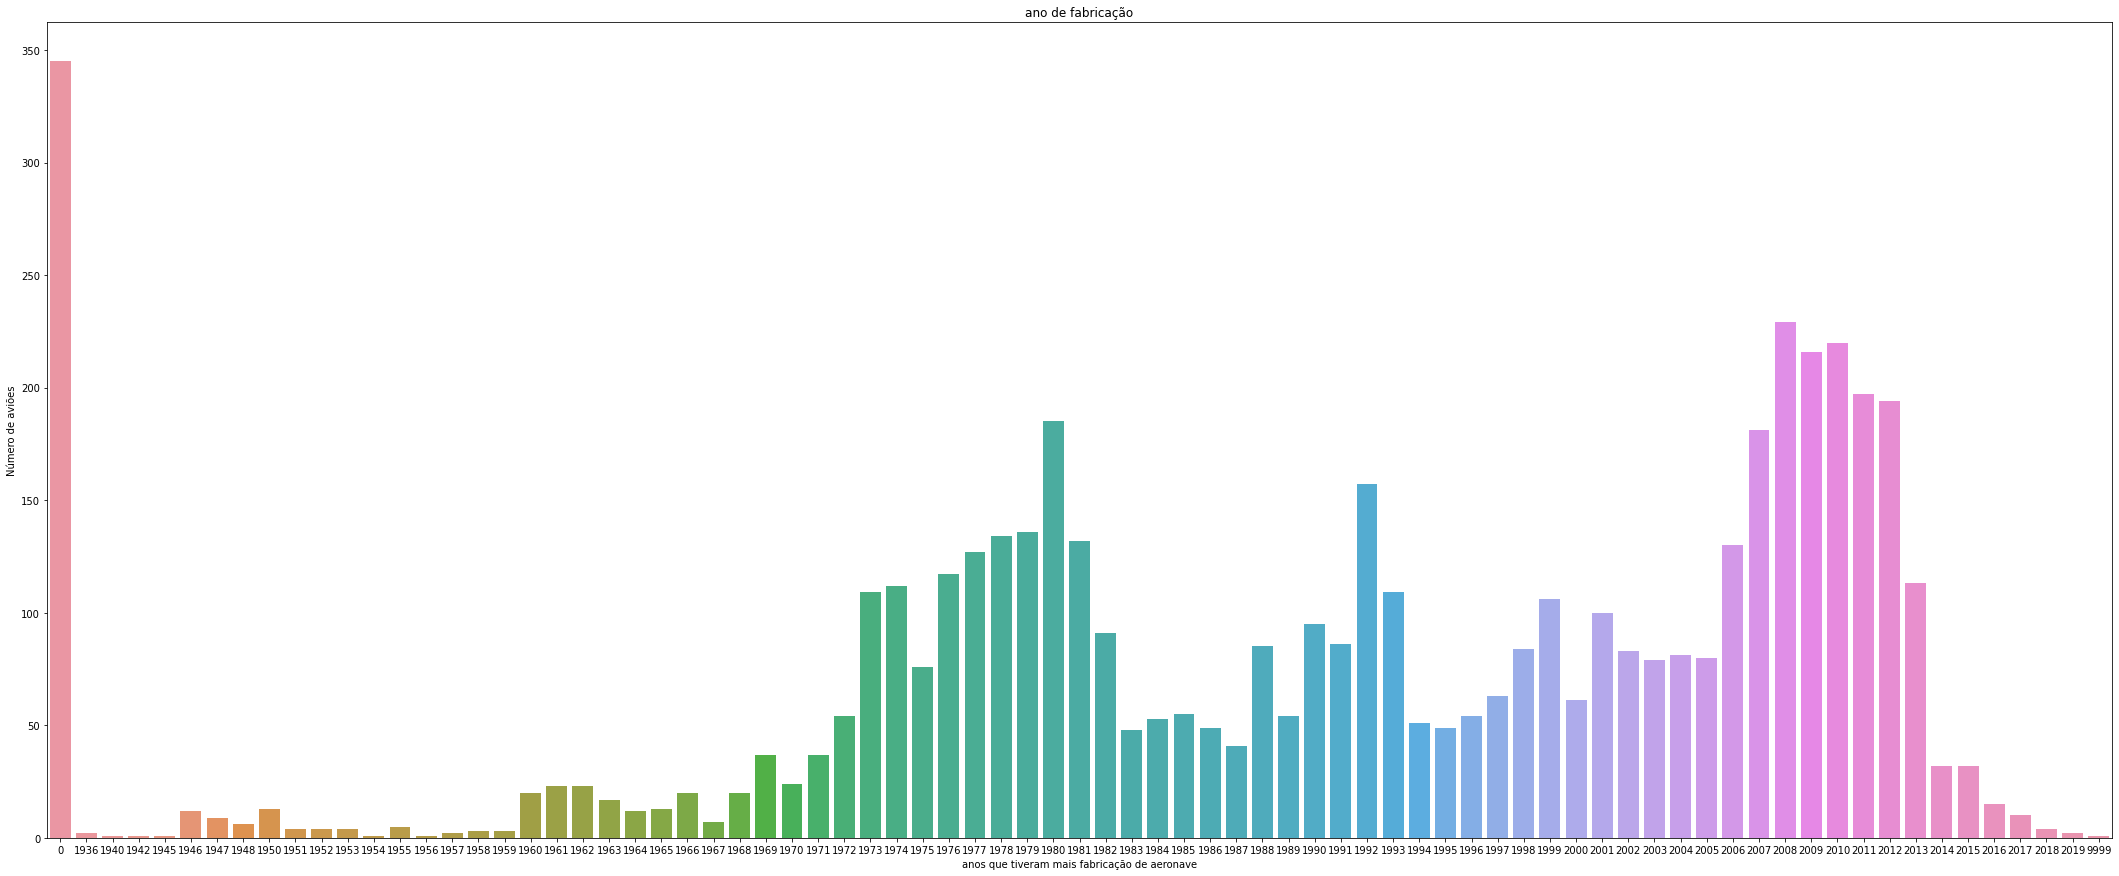

In [15]:
#ano de fabricação das naves

#organizando em ordem decrescente
sns.countplot(data=ae, x='aeronave_ano_fabricacao')

#titulos principais e dos eixos
plt.xlabel("anos que tiveram mais fabricação de aeronave")
plt.ylabel("Número de aviões")
plt.title("ano de fabricação")

#tamanho do grafico
plt.gcf().set_size_inches(37, 15)


plt.show()

No gráfico acima é possível visualizar a evolução aos longo dos anos em relação à fabricação de aeronaves. Temos do ano de 1945 uma fabricação mínima e conforme se passam os anos tivemos um aumento considerável, até o ano de 1972 que começa a ter uma fabricação em massa atingindo um pico em 1980 a partir disso uma produção regular até 2006 que começa a aumentar a produção por 6 anos a partir disso o numero de produção decai consideravelmente. podemos perceber que muitos aviões não possui registro do seu ano de produção como também representa boa parte da fabricação dos mesmos.

# **Motores dos Aviões**

In [16]:
amq = Counter(ae['aeronave_motor_quantidade'])
contador_amq = sorted(list(amq.values()), reverse = True)

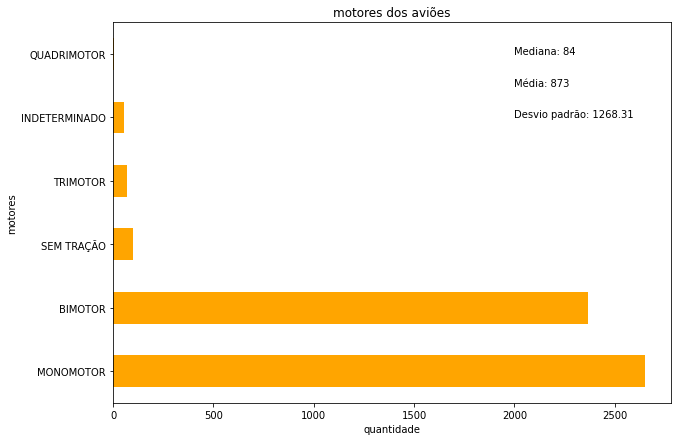

In [26]:
# motores das aeronaves

#organizando em ordem decrescente
ae['aeronave_motor_quantidade'].value_counts().plot(kind = 'barh', figsize=(10, 5), fontsize = 10, color=['orange']);

#titulos principais e dos eixos
plt.xlabel("quantidade")
plt.ylabel("motores")
plt.title("motores dos aviões")

plt.text(2000, 5, 'Mediana: %d'%(np.median(np.array(contador_amq ))))
plt.text(2000, 4.5, 'Média: %d'%(np.mean(np.array(contador_amq ))))
plt.text(2000, 4, 'Desvio padrão: %.2f'%(static.stdev(contador_amq )))

#tamanho do grafico
plt.gcf().set_size_inches(10, 7)
#plt.style.use("blue")
plt.show()

O maior indice de incidentes foi composta por aeronaves com Monomotor, passando as 2500 aeronaves com esse motor. Não muito atrás aeronaves com Bimotores, ultrapassando as 2000 aeronaves com esse tipo de motor.

# **Países Fabricantes**

In [31]:
pf = Counter(ae['aeronave_pais_fabricante'])
contador_pf = sorted(list(pf.values()), reverse = True)

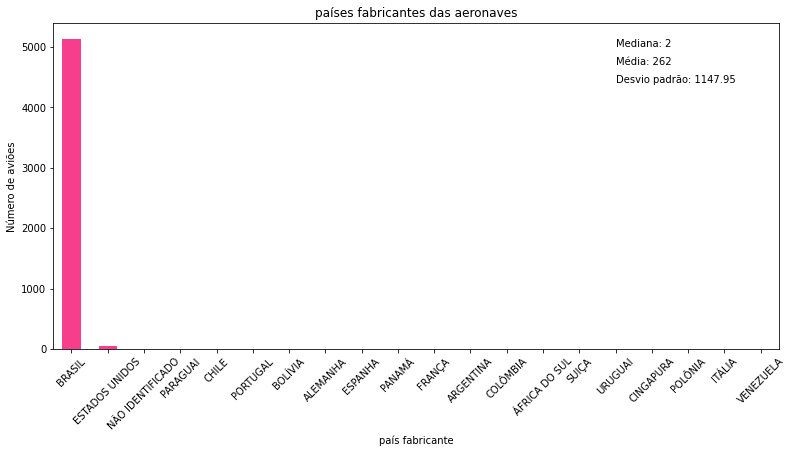

In [32]:
# países fabricantes

#organizando em ordem decrescente
ae['aeronave_pais_fabricante'].value_counts().plot(kind = 'bar', figsize=(10, 5), fontsize = 10, color=['#f73e8c']);

#titulos principais e dos eixos
plt.xlabel("país fabricante")
plt.ylabel("Número de aviões")
plt.title("países fabricantes das aeronaves")

plt.text(15, 5000, 'Mediana: %d'%(np.median(np.array(contador_pf ))))
plt.text(15, 4700, 'Média: %d'%(np.mean(np.array(contador_pf ))))
plt.text(15, 4400, 'Desvio padrão: %.2f'%(static.stdev(contador_pf )))

#tamanho do grafico 
plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
plt.show()

Neste gráfico citamos vários países, mas quem lidera a fabricação é o Brasil, os Estados Unidos fica em segundo lugar, porém a diferença nas fabricações é gigantesca tendo um número bem abaixo de aeronaves fabricadas.

# **Fabricante das Aeronaves**

In [20]:
#contagem de valores
af = Counter(ae['aeronave_fabricante'])
fase_af = sorted(af, key = af.get, reverse = True)
contador_af = sorted(list(af.values()), reverse = True)

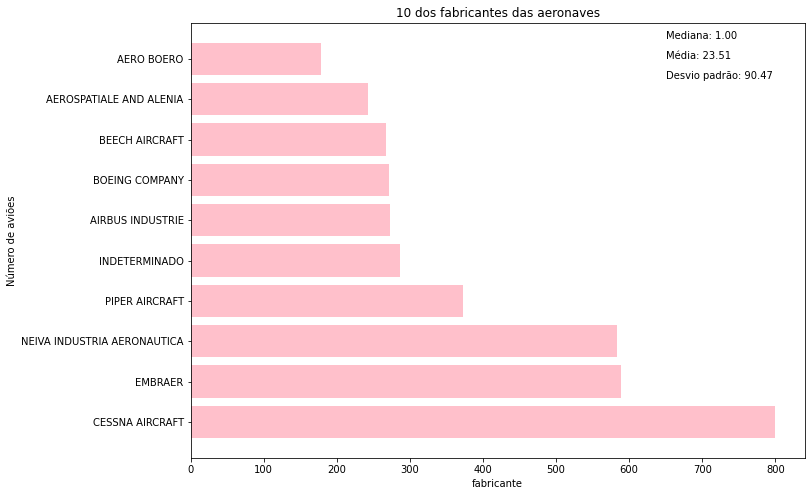

In [33]:
# fabricante das aeronaves

#organizando os eixos x e y do grafico junto com a cor
x=fase_af[:10]
y=contador_af[:10]
plt.barh(x, y, color='pink')

#titulos principais e dos eixos
plt.xlabel("fabricante")
plt.ylabel("Número de aviões")
plt.title("10 dos fabricantes das aeronaves")

plt.text(650, 9.5, 'Mediana: %.2f'%(np.median(np.array(contador_af))))
plt.text(650, 9, 'Média: %.2f'%(np.mean(np.array(contador_af))))
plt.text(650, 8.5, 'Desvio padrão: %.2f'%(static.stdev(contador_af)))

#tamanho do grafico
plt.gcf().set_size_inches(11, 8)
plt.show()

aqui mostra 10 dos maiores fabricantes de aeronaves, sendo um deles liderado por cessna aircraft, provavelmente por ser uma das empresas que mais produzem aviões particulares ou militares. Seguido pela embraer, que é composta pela neiva industria, que produz aviões comerciais.

# **Tipos de Motores Usados**

In [34]:
mt = Counter(ae['motor_tipo'])

contador_mt = sorted(list(mt.values()), reverse = True)

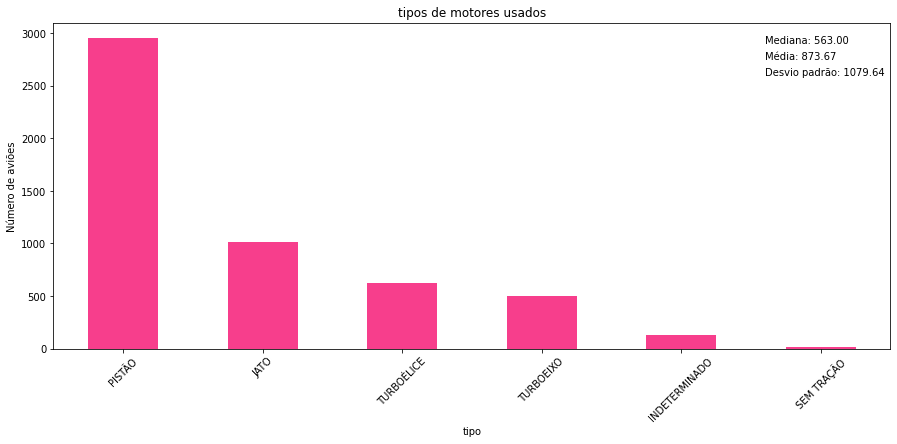

In [35]:

#organizando em ordem decrescente
ae['motor_tipo'].value_counts().plot(kind = 'bar', figsize=(10, 5), fontsize = 10, color=['#f73e8c']);

#titulos principais e dos eixos
plt.xlabel("tipo")
plt.ylabel("Número de aviões")
plt.title("tipos de motores usados")

plt.text(4.6, 2900, 'Mediana: %.2f'%(np.median(np.array(contador_mt))))
plt.text(4.6, 2750, 'Média: %.2f'%(np.mean(np.array(contador_mt))))
plt.text(4.6, 2600, 'Desvio padrão: %.2f'%(static.stdev(contador_mt)))

#tamanho do grafico mais a rotação do eixo X(titulos)
plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=45)
plt.show()

Todos os motores devem obedecer às exigências gerais de eficiência, economia e
confiabilidade. Além de econômico quanto ao consumo de combustível, um motor deve ser
econômico quanto ao custo de sua obtenção original e quanto ao custo de manutenção, e
tem que atender às exigências rigorosas da razão de eficiência e baixo peso de unidade por
potência. 

# **Aeronaves Envolvidas**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


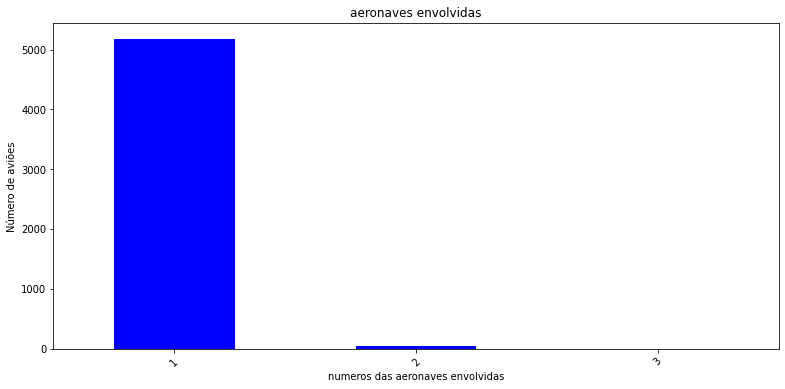

In [24]:

#organizando em ordem decrescente
ae['aeronaves_envolvidas'].value_counts().plot(kind = 'bar', figsize=(10, 5), fontsize = 10, color=['B']);

#titulos principais e dos eixos
plt.xlabel("numeros das aeronaves envolvidas")
plt.ylabel("Número de aviões")
plt.title("aeronaves envolvidas")

#tamanho do grafico mais a rotação do eixo X(titulos)
plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
plt.show()

Nesse grafico é possivel observar que as taxas de acidentes com mais de uma aeronave e são bem menores se comparado com a taxa de acidentes onde somente se tem uma aeronave envolvida

# **Numero de Assentos**

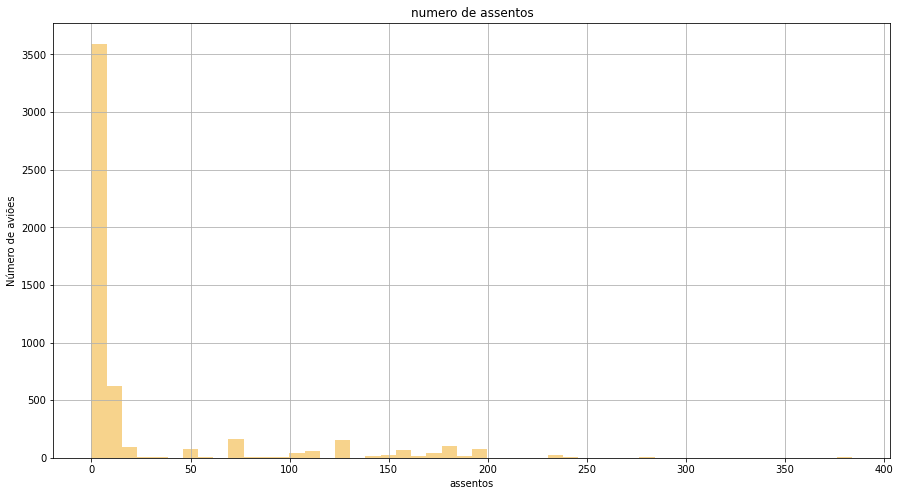

In [25]:
#assentos

#ae['aeronave_assentos'].value_counts().plot(kind = 'bar', figsize=(10, 5), fontsize = 10, color=['B']);

# grafico em histograma
ae.aeronave_assentos.hist(bins = 50, color = "#f7d38c")

#titulos principais e dos eixos
plt.xlabel("assentos")
plt.ylabel("Número de aviões")
plt.title("numero de assentos")

#tamanho do grafico 
plt.gcf().set_size_inches(15, 8)

plt.show()

Nota-se que a maioria dos acidentes são por aviões que tem poucos assentos, um indice que indica isso é que 46% dos acidentes ocorridos no brasil são por aviões de segmento particular

# **Conclusão Final**


***Conclusão Final***


  Esta pesquisa teve como objetivo analisar os fatores que são
determinantes para que ocasionem acidentes aeronáuticos e que,
consequentemente, afetam a segurança de voo. A metodologia usada para atingir tal objetivo foi a pesquisa descritiva, baseando-se em dados de estatísticas,
monografias entre outros. 

  Vimos que a segurança de voo é essencial para todos os envolvidos da
aviação, pois se trata de uma vida alheia correndo risco. Em razão disso, a empresa tem que que redobrar sua atenção quanto à manutenção e investir em melhorias contínuas e novas tecnologias para se evitar problemas durante o voo, pouso ou decolagem.

  A ausência de gastos com a manutenção acarreta um custo muito maior
para a empresa aérea do que o gasto que eventualmente teria com a ocorrência de
um acidente. Colocando na balança, vale muito mais gastar com a manutenção,
propiciando melhores condições aos passageiros, do que com a reparação dos danos. 

  O projeto teve em base apresentar dados de forma estatistica sobre os acidentes de aeronaves no Brasil, com analises graficas e conclusões a partir dos mesmos.
partes das analises feitas foi a partir de seus motores, o ano que teve mais acidentes e a região mais afetada.

  Uma das analises feitas foi que aviões particulares, que possuem poucos assentos, são os que mais tem ocorrencia de acidente em comparação a aviões comerciais e muitas dessas falhas se devem ao monotor que mais apresenta falha, sendo parte responsaveis por uns dos fabricantes a Cessna Aircraft.

  Já o fator operacional se relaciona com o desempenho do homem nas
atividades relacionadas com o voo.

  Por fim, o principal fator contributivo de aproximadamente 80% dos
acidentes aéreos é o fator humano, que corresponde a uma má decisão ou
julgamento, até mesmo um simples erro. 

  Analisando esse fator e sabendo que o ser
humano não é perfeito, cometendo falhas, é um fator que contribui muito para os
acidentes. Em razão da imperfeição do homem, mesmo que haja inúmeras barreiras
para evitar que aconteça alguma falha, ainda há chance de se ocorrer um acidente.

  Conclui-se que é uma missão muito difícil acabar com os acidentes
aeronáuticos, pois sua causa é um conjunto de fatores que se complementam entre
si, não podendo ser analisada isoladamente.

  Pode-se sugerir para estudos futuros pesquisas mais aprofundadas sobre
o uso da tecnologia adequada voltada para a segurança de voo, e assim mitigar os
acidentes na aviação. 








# **Referências**

 A**cidentes-com-avioes-pequenos -**
 www.jornalopcao.com.br/reportagens/por-que-acidentes-com-avioes-pequenos-sao-maioria-364152/



Avião com 133 passageiros sofre acidente na china - https://g1.globo.com/mundo/noticia/2022/03/21/aviao-com-133-passageiros-sofre-acidente-na-china.ghtml



**Brasil teve 111 acidentes com aeronaves de pequeno porte em 2021 -**
https://www.poder360.com.br/brasil/brasil-teve-111-acidentes-com-aeronaves-de-pequeno-porte-em-2021/



**Brasil fecha 2012 com novo recorde de acidentes aereos -** 
https://g1.globo.com/brasil/noticia/2013/01/brasil-fecha-2012-com-novo-recorde-de-acidentes-aereos-aponta-cenipa.html



**Pilotos causaram maioria de acidentes aereos -** 
https://g1.globo.com/am/amazonas/noticia/2013/04/em-2012-pilotos-causaram-maioria-de-acidentes-aereos-no-am-diz-seripa.html